# IMPORTING LIBRARIES

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# LOADING DATA

In [20]:
wine_flag = pd.read_csv('https://raw.githubusercontent.com/bforoura/IDS/main/HW5/wine_flag_all.csv')

# TOP 10 ROWS OF THE DATA

In [21]:
wine_flag.head(10)

,Type,Alcohol_flag,Sugar_flag
0,Red,High,High
1,Red,High,Low
2,Red,Low,High
3,Red,High,Low
4,Red,Low,Low
5,Red,Low,Low
6,Red,High,Low
7,Red,Low,Low
8,Red,Low,Low
9,Red,Low,Low


Note:
- The data have 3 features
- Alcohol_flag, Sugar_flag are an independent features & Type is a dependent feature
- This is classification problem

# DATA SHAPE

In [22]:
wine_flag.shape

(3345, 3)

Note:
- The data 3345 observations and 3 features

# VALUE COUNTS OF EACH FEATURES

In [113]:
for i in wine_flag.keys():
    print(f'{i}:')
    print(wine_flag[i].value_counts())
    print('-'*50)

Type:
1    2260
0    1085
Name: Type, dtype: int64
--------------------------------------------------
Alcohol_flag:
0    1684
1    1661
Name: Alcohol_flag, dtype: int64
--------------------------------------------------
Sugar_flag:
0    1726
1    1619
Name: Sugar_flag, dtype: int64
--------------------------------------------------


In [114]:
for i in wine_flag.keys():
    print(f'{i}:')
    print(wine_flag[i].value_counts(normalize=True))
    print('-'*50)

Type:
1    0.675635
0    0.324365
Name: Type, dtype: float64
--------------------------------------------------
Alcohol_flag:
0    0.503438
1    0.496562
Name: Alcohol_flag, dtype: float64
--------------------------------------------------
Sugar_flag:
0    0.515994
1    0.484006
Name: Sugar_flag, dtype: float64
--------------------------------------------------


Note:
- The Type feature have imbalanced class
- Alcohol_flag & Sugar_flag 50:50 proportion of the classes

# MISSING VALUES

In [24]:
wine_flag.isnull().sum()

Type            0
Alcohol_flag    0
Sugar_flag      0
dtype: int64

Note:
- No missing value identified

# CONTINGENCY TABLE: TYPE VS ALCOHOL_FLAG

In [36]:
c_table1 = wine_flag[['Type','Alcohol_flag']].value_counts().unstack().rename_axis(None,axis=1)
c_table1['High_%'] = round(c_table1['High']/c_table1['High'].sum()*100)
c_table1['Low_%'] = round(c_table1['Low']/c_table1['Low'].sum()*100)
c_table1

,High,Low,High_%,Low_%
Type,,,,
Red,485,600,29.0,36.0
White,1176,1084,71.0,64.0


Note:
- Wine type red have high alcohol flag 29% and low alcohol flag 36%
- Wine type white have high alcohol flag 71% and low alcohol flag 64%

# CONTINGENCY TABLE: TYPE VS SUGAR_FLAG

In [37]:
c_table2 = wine_flag[['Type','Sugar_flag']].value_counts().unstack().rename_axis(None,axis=1)
c_table2['High_%'] = round(c_table2['High']/c_table2['High'].sum()*100)
c_table2['Low_%'] = round(c_table2['Low']/c_table2['Low'].sum()*100)
c_table2

,High,Low,High_%,Low_%
Type,,,,
Red,237,848,15.0,49.0
White,1382,878,85.0,51.0


Note:

- Wine type red have high sugar flag 15% and low sugar flag 49%
- Wine type white have high sugar flag 85% and low sugar flag 51%

# PLOTING CONTINGENCY TABLE TYPE VS ALCOHOL_FLAG

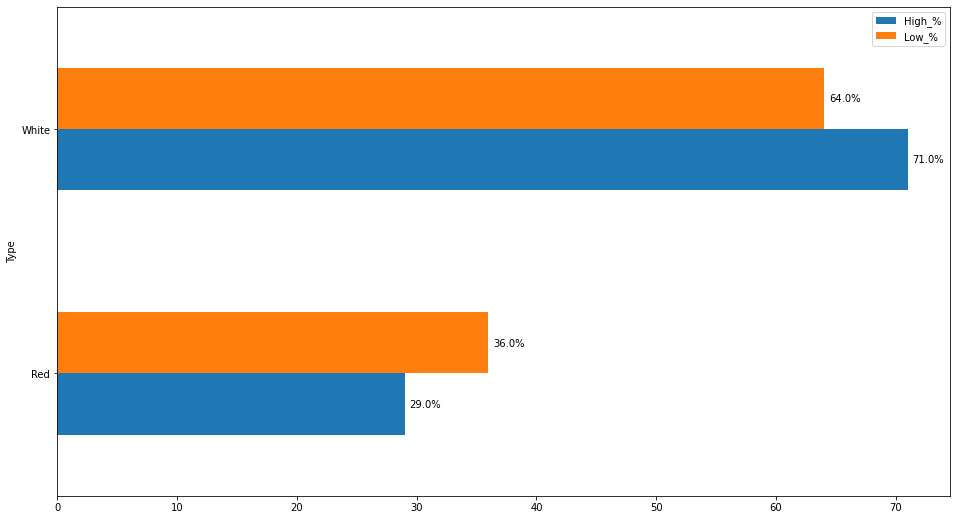

In [38]:
ax = c_table1.iloc[:,2:].plot(kind='barh', figsize=(16,9));
for p in ax.patches:
    ax.annotate("%.1f%%" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

# PLOTING CONTINGENCY TABLE TYPE VS SUGAR_FLAG

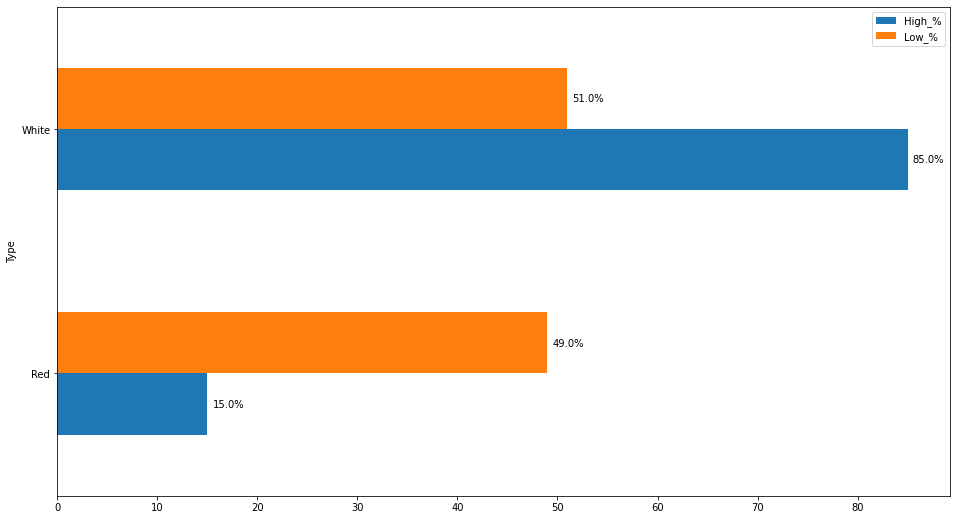

In [39]:
ax = c_table2.iloc[:,2:].plot(kind='barh', figsize=(16,9));
for p in ax.patches:
    ax.annotate("%.1f%%" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

# PROBABILITIES

### THE PRIOR PROBABILITY OF TYPE = RED AND TYPE = WHITE

 - Prior_Probability_for_Red = Number_of_Red / Total_Number_of_Observations
 - Prior_Probability_for_White = Number_of_White / Total_Number_of_Observations

In [35]:
Prior_Probability_for_Red = (1085)/3345
Prior_Probability_for_White = (2260)/3345
print(f'Prior Probability of Type Red: {Prior_Probability_for_Red}')
print(f'Prior Probability of Type White: {Prior_Probability_for_White}')

Prior Probability of Type Red: 0.3243647234678625
Prior Probability of Type White: 0.6756352765321375


### THE PROBABILITY OF HIGH AND LOW ALCOHOL CONTENT

- Probability_of_high_alcohol_content = Number_of_high/Total_Number_of_Observations
- Probability_of_low_alcohol_content = Number_of_low/Total_Number_of_Observations

In [50]:
Proba_for_low_alcohol = 1684/3345
Probab_for_high_alcohol = 1661/3345
print(f'Probability of Low Alcohol: {Proba_for_low_alcohol}')
print(f'Probability of High Alcohol: {Probab_for_high_alcohol}')

Probability of Low Alcohol: 0.5034379671150971
Probability of High Alcohol: 0.49656203288490286


### THE PROBABILITY OF HIGH AND LOW SUGAR CONTENT

- Probability_of_high_sugar_content = Number_of_high/Total_Number_of_Observations
- Probability_of_low_sugar_content = Number_of_low/Total_Number_of_Observations

In [51]:
Prob_for_low_sugar = 1726/3345
Prob_for_high_sugar = 1619/3345
print(f'Probability of Low Alcohol: {Prob_for_low_sugar}')
print(f'Probability of High Alcohol: {Prob_for_high_sugar}')

Probability of Low Alcohol: 0.5159940209267564
Probability of High Alcohol: 0.48400597907324366


### THE CONDITIONAL PROBABILITIES P(ALCOHOL_FLAG = HIGH ∣ TYPE = RED)

 Alcohol Flag:
 - P(Red | High) = 485/1661
 - P(High) = 1661/3345
 - P(Red) = 1085/3345
 
Formula:
 - P(High ∣Red) = P(Red | High)*P(High)/P(Red)

In [60]:
print(f'Condition probability P(Alcohol_flag = High | Type = Red) : {((485/1661)*(1661/3345))/(1085/3345)}')

Condition probability P(Alcohol_flag = High | Type = Red) : 0.44700460829493094


### THE CONDITIONAL PROBABILITIES P(ALCOHOL_FLAG = LOW ∣ TYPE = RED)

Alcohol Flag:
- P(Red | Low) = 600/1684
- P(Low) = 1684/3345
- P(Red) = 1085/3345

Formula:
- P(High ∣Red) = P(Red | High)*P(High)/P(Red)

In [62]:
print(f'Condition probability P(Alcohol_flag = Low | Type = Red) : {((600/1684)*(1684/3345))/(1085/3345)}')

Condition probability P(Alcohol_flag = Low | Type = Red) : 0.5529953917050691


### THE CONDITIONAL PROBABILITIES P(SUGAR_FLAG = HIGH ∣ TYPE = RED)

Sugar Flag:
- P(Red | High) = 237/1619
- P(High) = 1619/3345
- P(Red) = 1085/3345

Formula:
- P(High ∣Red) = P(Red | High)*P(High)/P(Red)

In [63]:
print(f'Condition probability P(Sugar_flag = High | Type = Red) : {((237/1619)*(1619/3345))/(1085/3345)}')

Condition probability P(Sugar_flag = High | Type = Red) : 0.21843317972350232


### THE CONDITIONAL PROBABILITIES P(SUGAR_FLAG = LOW ∣ TYPE = RED)

Sugar Flag:
- P(Red | Low) = 848/1726
- P(Low) = 1726/3345
- P(Red) = 1085/3345

Formula:
- P(Low ∣Red) = P(Red | Low)*P(Low)/P(Red)

In [64]:
print(f'Condition probability P(Sugar_flag = Low | Type = Red) : {((848/1726)*(1726/3345))/(1085/3345)}')

Condition probability P(Sugar_flag = Low | Type = Red) : 0.7815668202764977


# ENCODING THE FEATURES

In [65]:
order_mapping = {'Low':0, 'High':1}
wine_flag['Alcohol_flag'] = wine_flag['Alcohol_flag'].map(order_mapping)
wine_flag['Sugar_flag'] = wine_flag['Sugar_flag'].map(order_mapping)

label_mapping = {'Red':0, 'White':1}
wine_flag['Type'] = wine_flag['Type'].map(label_mapping)

Note:
- Alcohol_flag & Sugar_flag features have ordered class hence encoded with ordered labels
- Type features does not show any ordered hence encoded with alphabetical ordered

# MODEL TRAINING ON DIFFERENT COMBINATION OF TRAIN AND TEST SPLITTING DATA RATIO 80-20, 75-25, 70-30, 60-40, 50-50

In [111]:
X = wine_flag.drop(columns='Type')
y = wine_flag['Type']

accuracy = []
ratio = []

for i in [.20, .25, .30, 0.35, .40, .45, .50]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, shuffle=True)
    nb = BernoulliNB()
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    ratio.append(f'{round((1-i)*100)}:{round(i*100)}')
    print(f' Splitting Ratio {round((1-i)*100)}:{round(i*100)} | Accuracy : {round(accuracy_score(y_test, y_pred),4)}')

 Splitting Ratio 80:20 | Accuracy : 0.71
 Splitting Ratio 75:25 | Accuracy : 0.7683
 Splitting Ratio 70:30 | Accuracy : 0.7534
 Splitting Ratio 65:35 | Accuracy : 0.713
 Splitting Ratio 60:40 | Accuracy : 0.7265
 Splitting Ratio 55:45 | Accuracy : 0.728
 Splitting Ratio 50:50 | Accuracy : 0.7205


# PLOTTING MODEL ACCURACY

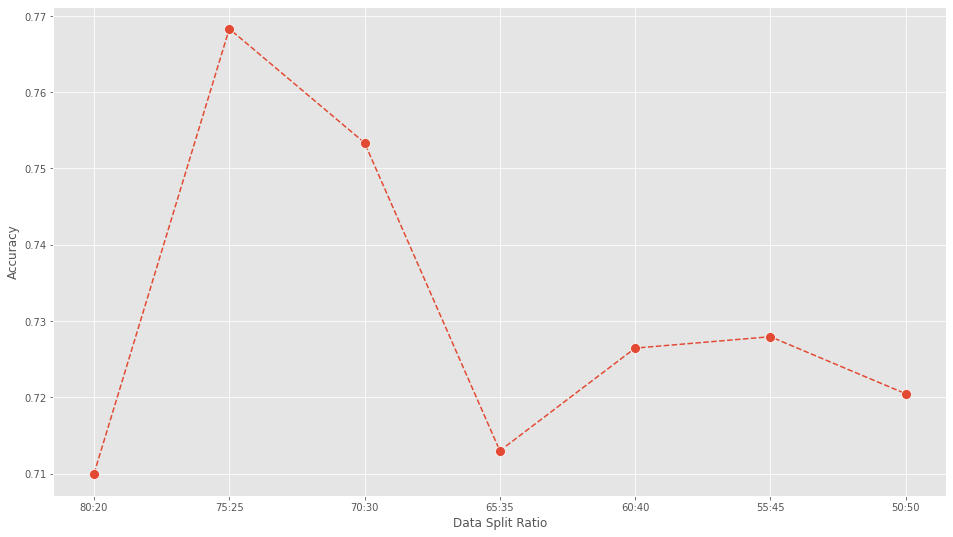

In [112]:
plt.figure(figsize=(16,9))
plt.style.use('ggplot')
sns.lineplot(x=ratio, y=accuracy, marker='o', linestyle='--', markersize=10);
plt.xlabel('Data Split Ratio');
plt.ylabel('Accuracy');
plt.show()

Notes:
- Data splitting Ratio 75% - 25% have high accuracy : 0.7683

# END 